In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("G:\Data Science with ML and AI\Omnify_internship\Omnify-Analyst-Intership-Task.xlsx")

In [4]:
df.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA


In [5]:
df.tail()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
413,2021-05-03,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,0,1,0.0,0,0,NaN,NaT,USA
414,2021-05-03,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Exact,Exact,yoga studio booking software,USD,0,6,0.0,0,0,NaN,NaT,USA
415,2021-05-03,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,0,0,0.0,0,0,NaN,NaT,USA
416,2021-05-03,EK_Generic_Quad-Tok_Pilates,Pilates_Studio_Booking_Software_Broad,Broad,pilates studio booking software,USD,0,1,0.0,0,0,NaN,NaT,USA
417,2021-05-03,EK_Generic_Quad-Tok_Pilates,Pilates_Studio_Management_Software_Exact,Exact,pilates studio management software,USD,0,3,0.0,0,0,NaN,NaT,USA


DATASET DESCRIPTION :
- 'cost' is our total ad spends for that particular date.
- 'Impressions' are the count of people who view our ad
- 'clicks' are count of clicks on our ad
-  'prospects' are count of people interested in our product (as marked by sales)
- 'Payments' are purchases made. Returns on Ad spends are calculated using Payments/Cost.
- Each row is cohortised to the date of ad spends so you can compare quality of ad spends.
 

QUESTION:
- Create a combined report with all key metrics (esp: Spends and Returns %) in a weekly and monthly format. Decide the number of data fields you would like to showcase here.
- Which is the most profitable channel
- Which category/keyword is the most profitable
- Look for insights by analyzing data points on time series graphs
- Analyse the Impact of geography

In [6]:
df.shape

(418, 14)

<h3>1. Data preprocessing and calculating metrics</h3>

In [7]:
df.rename(columns={
    'Week': 'Week_Start_Date',
    'Campaign': 'Campaign_Name',
    'Ad group': 'Ad_Group',
    'Keyword type': 'Keyword_Type',
    'Search Keyword': 'Search_Keyword',
    'Currency': 'Currency',
    'Clicks': 'Clicks',
    'Impressions': 'Impressions',
    'Cost ($)': 'Cost',
    'Leads': 'Leads',
    'Prospects': 'Prospects',
    'Payment ($)': 'Payment',
    'Payment Date': 'Payment_Date',
    'Country': 'Country'
}, inplace=True)

In [8]:
df.columns=df.columns.str.lower()
df.columns

Index(['week_start_date', 'campaign_name', 'ad_group', 'keyword_type',
       'search_keyword', 'currency', 'clicks', 'impressions', 'cost', 'leads',
       'prospects', 'payment', 'payment_date', 'country'],
      dtype='object')

In [9]:
df.isna().sum()

week_start_date      0
campaign_name        0
ad_group             0
keyword_type         0
search_keyword       6
currency             0
clicks               0
impressions          0
cost                 0
leads                0
prospects            0
payment            410
payment_date       410
country              0
dtype: int64

Conclusion: there are 2 columns that contains null values.

In [10]:
# fill missing or empty values with 0
df['payment'].fillna(0, inplace=True)
df['payment_date'].fillna(0, inplace=True)


In [11]:
df.isna().sum()

week_start_date    0
campaign_name      0
ad_group           0
keyword_type       0
search_keyword     6
currency           0
clicks             0
impressions        0
cost               0
leads              0
prospects          0
payment            0
payment_date       0
country            0
dtype: int64

conclusion: now there iss no missing values present in the dataset.

In [12]:
# Check for Duplicate rows
df.duplicated().any()

False

conclusion: There are no duplicate rows present in the dataset.

In [13]:
df.columns

Index(['week_start_date', 'campaign_name', 'ad_group', 'keyword_type',
       'search_keyword', 'currency', 'clicks', 'impressions', 'cost', 'leads',
       'prospects', 'payment', 'payment_date', 'country'],
      dtype='object')

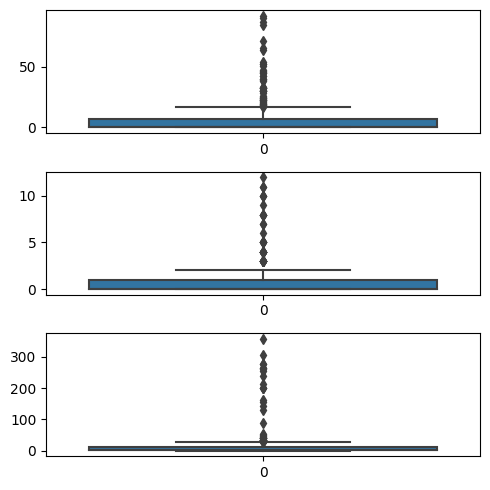

In [14]:
# Checking for outliers
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['cost'], ax = axs[0])
plt2 = sns.boxplot(df['clicks'], ax = axs[1])
plt3 = sns.boxplot(df['impressions'], ax = axs[2])
plt.tight_layout()


Exploratory Data Analysis

C:\Users\Lakshya\AppData\Local\Temp\ipykernel_3464\1994503952.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cost'])


<AxesSubplot: xlabel='cost', ylabel='Density'>

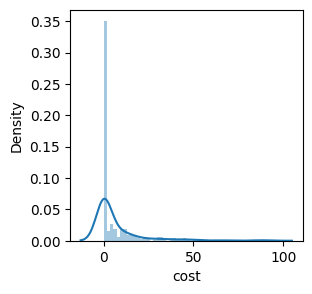

In [15]:
plt.figure(figsize=(3,3))
sns.distplot(df['cost'])

Conclusion : we do not spend most of the ad

C:\Users\Lakshya\AppData\Local\Temp\ipykernel_3464\3872140985.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['payment'])


<AxesSubplot: xlabel='payment', ylabel='Density'>

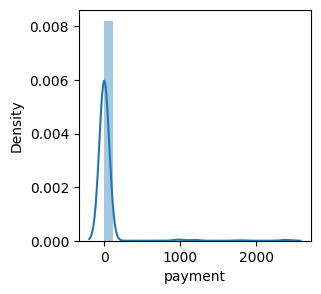

In [16]:
plt.figure(figsize=(3,3))
sns.distplot(df['payment'])

Conclusion : max payment is about $1000

In [17]:
# Calculate the Returns percentage and add it as a new column
df['return_%'] = (df['payment'] / df['cost']) * 100

In [18]:
df['return_%']

0      2556.744065
1         0.000000
2      2632.395302
3         0.000000
4         0.000000
          ...     
413            NaN
414            NaN
415            NaN
416            NaN
417            NaN
Name: return_%, Length: 418, dtype: float64

In [19]:
# Extract week and month from the 'Week' column
df['week'] = pd.to_datetime(df['week_start_date'])
df['month'] = df['week'].dt.to_period('M')

In [20]:
selected_columns = df[['week_start_date', 'week', 'month']]
selected_columns

,week_start_date,week,month
0,2021-01-25,2021-01-25,2021-01
1,2021-01-25,2021-01-25,2021-01
2,2021-01-25,2021-01-25,2021-01
3,2021-01-25,2021-01-25,2021-01
4,2021-01-25,2021-01-25,2021-01
...,...,...,...
413,2021-05-03,2021-05-03,2021-05
414,2021-05-03,2021-05-03,2021-05
415,2021-05-03,2021-05-03,2021-05
416,2021-05-03,2021-05-03,2021-05


In [21]:
# Group the data by week 
weekly_report = df.groupby('week').agg({
    'cost': 'sum',
    'payment': 'sum',
    'return_%': 'mean',
    'clicks': 'sum',
    'impressions': 'sum',
    'leads': 'sum',
    'prospects': 'sum'
}).reset_index()

In [22]:
weekly_report

,week,cost,payment,return_%,clicks,impressions,leads,prospects
0,2021-01-25,154.79,2168.0,576.571041,15,319,1,2
1,2021-02-01,192.58,0.0,0.000000,19,373,0,1
2,2021-02-08,216.13,980.0,677.731674,21,364,0,1
3,2021-02-15,235.30,1788.0,1243.999165,35,671,0,2
4,2021-02-22,190.90,0.0,0.000000,22,478,0,1
5,2021-03-01,141.40,980.0,331.282537,14,407,0,1
6,2021-03-08,258.20,0.0,0.000000,34,503,3,1
7,2021-03-15,184.36,0.0,0.000000,22,468,1,0
8,2021-03-22,308.73,2388.0,366.285758,46,659,1,4
9,2021-03-29,172.11,0.0,0.000000,39,586,0,0


<b>Conclusion:</b> 
- we will have one row for each week, with columns showing the sum of cost, payments, clicks, impression, leads, prospects, and the mean of return percentage (purchase/costs) for each week.

In [23]:
# Group the data by month
monthly_report = df.groupby('month').agg({
    'cost': 'sum',
    'payment': 'sum',
    'return_%': 'mean',
    'clicks': 'sum',
    'impressions': 'sum',
    'leads': 'sum',
    'prospects': 'sum'
}).reset_index()

In [24]:
monthly_report

,month,cost,payment,return_%,clicks,impressions,leads,prospects
0,2021-01,154.79,2168.0,576.571041,15,319,1,2
1,2021-02,834.91,2768.0,449.506339,97,1886,0,5
2,2021-03,1064.80,3368.0,128.739866,155,2623,5,6
3,2021-04,504.81,2388.0,347.395985,89,1600,5,5
4,2021-05,229.37,1188.0,139.178519,31,537,1,3


Conclusion : 
- we will have one row for each week, with columns showing the sum of cost, payments, clicks, impression, leads, prospects, and the mean of return percentage (purchase/costs) for each week.
- from above monthly report we conclude that in 1st month we get maximum return_% with least spendings on ad.

In [25]:
monthly_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   month        5 non-null      period[M]
 1   cost         5 non-null      float64  
 2   payment      5 non-null      float64  
 3   return_%     5 non-null      float64  
 4   clicks       5 non-null      int64    
 5   impressions  5 non-null      int64    
 6   leads        5 non-null      int64    
 7   prospects    5 non-null      int64    
dtypes: float64(3), int64(4), period[M](1)
memory usage: 448.0 bytes


<h3>2.Which is the most profitable channel</h3>

In [26]:
df.head(1)

,week_start_date,campaign_name,ad_group,keyword_type,search_keyword,currency,clicks,impressions,cost,leads,prospects,payment,payment_date,country,return_%,week,month
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,2021-02-03 00:00:00,USA,2556.744065,2021-01-25,2021-01


In [27]:
# for finding the most profitable cahnnel by considering max. return persentage.
channel_profitability = df.groupby('campaign_name')['return_%'].mean()
channel_profitability

campaign_name
EK_Generic_Quad-Tok_Pilates                   0.000000
EK_Generic_Quad-Tok_Yoga                    291.257239
EK_Generic_Quad-Tok_Yoga_Singapore            0.000000
EK_Generic_Swimming                         138.084131
EK_Generic_Swimming_Canada                    0.000000
EK_Generic_Swimming_Singapore                 0.000000
EK_Generic_Swimming_UK                      739.343644
EK_Generic_Tri-Tok_Pilates                    0.000000
EK_Generic_Tri-Tok_Reservation              898.263537
EK_Generic_Tri-Tok_Reservation_Canada         0.000000
EK_Generic_Tri-Tok_Reservation_Singapore      0.000000
EK_Generic_Tri-Tok_Reservation_UAE            0.000000
EK_Generic_Tri-Tok_Reservation_UK             0.000000
EK_Generic_Tri-Tok_Yoga                     164.483704
EK_Generic_Tri-Tok_Yoga_Singapore                  NaN
Name: return_%, dtype: float64

Conclusion:
- channel with having highest average return percentage is the most profitable channel.

In [28]:
most_profitable_channel = channel_profitability.idxmax()
most_profitable_channel

'EK_Generic_Tri-Tok_Reservation'

Conclusion:
- <b>'EK_Generic_Tri-Tok_Reservation'</b> is the most profitable channel.

<h3>3. Which category/keyword is the most profitable</h3>

In [29]:
df.head(2)

,week_start_date,campaign_name,ad_group,keyword_type,search_keyword,currency,clicks,impressions,cost,leads,prospects,payment,payment_date,country,return_%,week,month
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,2021-02-03 00:00:00,USA,2556.744065,2021-01-25,2021-01
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,0.0,0,USA,0.000000,2021-01-25,2021-01


In [30]:
# Group by 'Keyword type' and find the most profitable category/keyword
most_profitable_keyword = df.groupby('keyword_type')['return_%'].mean().idxmax()
most_profitable_keyword

'Broad'

In [31]:
most_profitable_search_keyword = df.groupby('search_keyword')['return_%'].mean().idxmax()
most_profitable_search_keyword

'reservation management system'

Conclusion :
- Most profitable category/keyword is <b>Broad</b>.
- Most profitable search category/keyword is <b>reservation management system</b>.


<h3>4. Time-Series Analysis</h3>

In [32]:
df.columns

Index(['week_start_date', 'campaign_name', 'ad_group', 'keyword_type',
       'search_keyword', 'currency', 'clicks', 'impressions', 'cost', 'leads',
       'prospects', 'payment', 'payment_date', 'country', 'return_%', 'week',
       'month'],
      dtype='object')

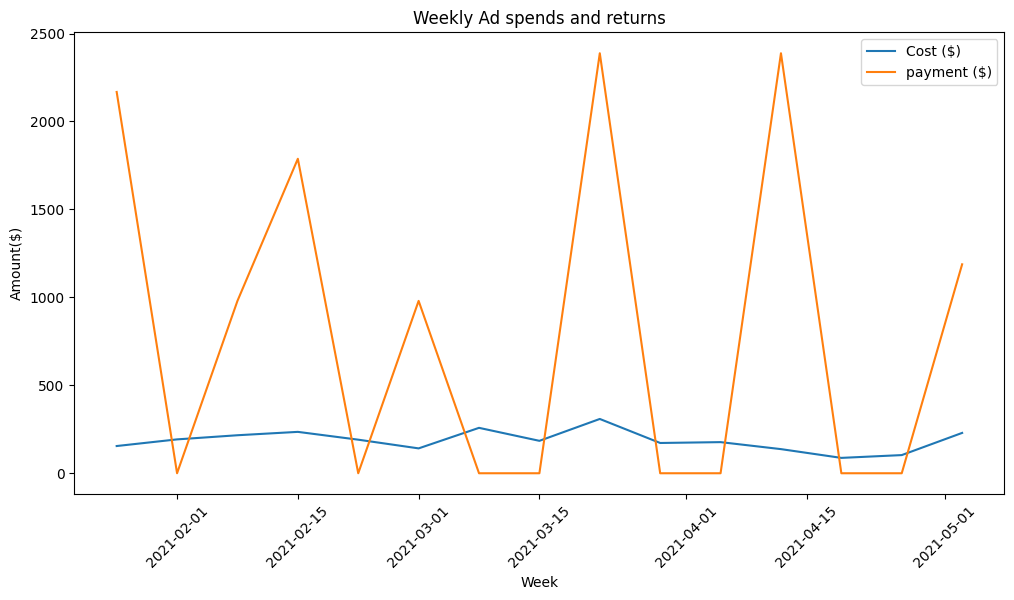

In [33]:
# Time series graph for weekly format:
plt.figure(figsize=(12,6))
sns.lineplot(x='week',y='cost', data=weekly_report,label='Cost ($)')
sns.lineplot(x='week',y='payment', data=weekly_report,label='payment ($)')
plt.title('Weekly Ad spends and returns')
plt.xlabel('Week')
plt.ylabel('Amount($)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [34]:
# monthly_report['month'] = monthly_report['month'].dt.strftime('%Y-%m') 
monthly_report.info()
x = df['month'].astype(str)
x.dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   month        5 non-null      period[M]
 1   cost         5 non-null      float64  
 2   payment      5 non-null      float64  
 3   return_%     5 non-null      float64  
 4   clicks       5 non-null      int64    
 5   impressions  5 non-null      int64    
 6   leads        5 non-null      int64    
 7   prospects    5 non-null      int64    
dtypes: float64(3), int64(4), period[M](1)
memory usage: 448.0 bytes


dtype('O')

In [ ]:
# df['month'] = df['week'].dt.to_period('M')
monthly_report['month'] = pd.to_datetime(monthly_report['month'])


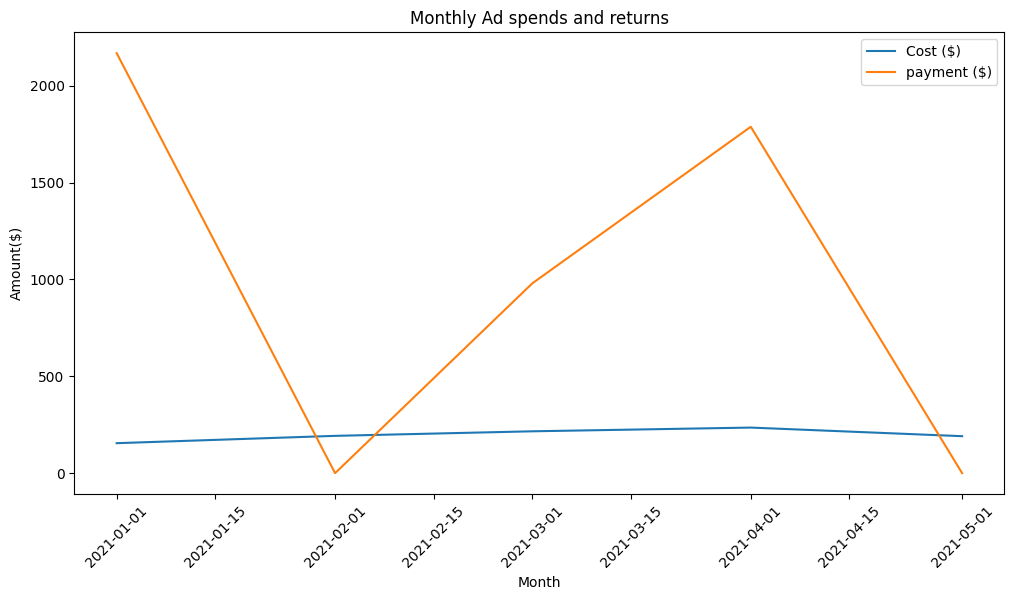

In [ ]:
# Time series graph for monthly format:
# df['month'] = df['week'].dt.to_period('M')
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_report['month'],y='cost', data=weekly_report,label='Cost ($)')
sns.lineplot(x=monthly_report['month'],y='payment', data=weekly_report,label='payment ($)')
plt.title('Monthly Ad spends and returns')
plt.xlabel('Month')
plt.ylabel('Amount($)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

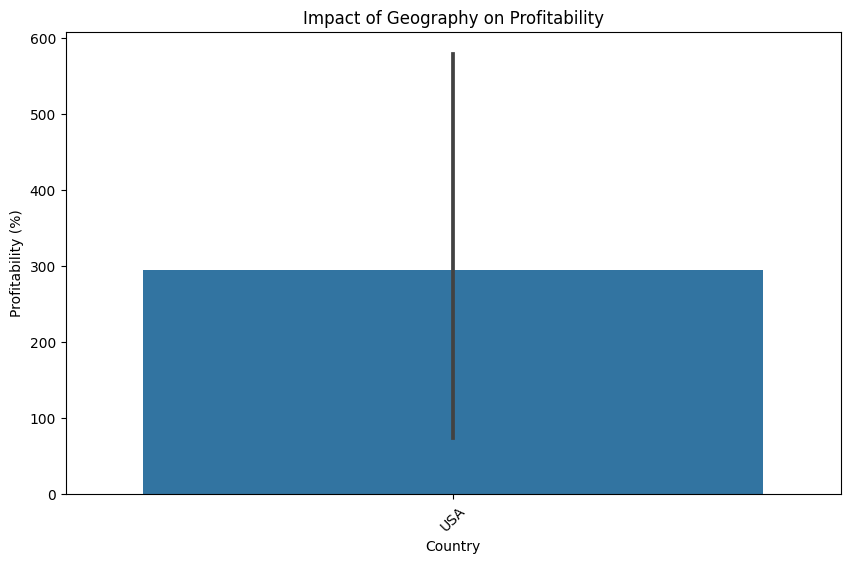

In [39]:
# Impact of geography (country) on key metrics
df['mean_']
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='return_%', data=df)
plt.title('Impact of Geography on Profitability')
plt.xlabel('Country')
plt.ylabel('Profitability (%)')
plt.xticks(rotation=45)
plt.show()

Conclusion:
- the height of the bar represents the average profitability for USA.
- a value of approx 300% would imply that the returns generated from advertising spends USA are three times the amount spent on advertising.
- profitability =( purchase/cost ) *100
- the height of the bar represents the average profitability for that country